<a href="https://colab.research.google.com/github/Sravani-05/Reinforcement_Learning/blob/main/comparison_qlearning_sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyopengl
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install x11-utils
!pip install pyglet
!apt-get install -y xvfb python-opengl
!pip install pyopengl
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!apt-get install -y freeglut-devel > /dev/null 2>&1
!apt-get install xvfb
!pip install gym

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 x11-utils
0 upgraded, 5 newly installed, 0 to remove and 18 not upgraded.
Need to get 318 kB of archives.
After this operation, 1,053 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxxf86dga1 amd64 2:1.1.5-0ubuntu3 [12.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-utils amd64 7.7+5build2 [206 kB]
Fetched

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()
from gym.wrappers.monitoring.video_recorder import VideoRecorder

In [3]:
#MAX_NUM_EPISODES = 500
MAX_NUM_EPISODES = 2000
STEPS_PER_EPISODE = 200 #  This is specific to MountainCar. May change with env
EPSILON_MIN = 0.005
max_num_steps = MAX_NUM_EPISODES * STEPS_PER_EPISODE
EPSILON_DECAY = 500 * EPSILON_MIN / max_num_steps
ALPHA = 0.05  # Learning rate
GAMMA = 0.98  # Discount factor
NUM_DISCRETE_BINS = 30  # Number of bins to Discretize each observation dim

class Sarsa_Learner(object):
    def __init__(self, env):
        self.obs_shape = env.observation_space.shape
        self.obs_high = env.observation_space.high
        self.obs_low = env.observation_space.low
        self.obs_bins = NUM_DISCRETE_BINS  # Number of bins to Discretize each observation dim
        self.bin_width = (self.obs_high - self.obs_low) / self.obs_bins
        self.action_shape = env.action_space.n
        # Create a multi-dimensional array (aka. Table) to represent the
        # Q-values
        self.Q = np.zeros((self.obs_bins + 1, self.obs_bins + 1,
                           self.action_shape))  # (51 x 51 x 3)
        self.alpha = ALPHA  # Learning rate
        self.gamma = GAMMA  # Discount factor
        self.epsilon = 1.0

    def discretize(self, obs):
        return tuple(((obs - self.obs_low) / self.bin_width).astype(int))

    def get_action(self, obs):
        discretized_obs = self.discretize(obs)
        # Epsilon-Greedy action selection
        if self.epsilon > EPSILON_MIN:
            self.epsilon -= EPSILON_DECAY
        if np.random.random() > self.epsilon:
            return np.argmax(self.Q[discretized_obs])
        else:  # Choose a random action
            return np.random.choice([a for a in range(self.action_shape)])

    def learn(self, obs, action, reward, next_obs, next_action):
        discretized_obs = self.discretize(obs)
        discretized_next_obs = self.discretize(next_obs)
        td_target = reward + self.gamma * self.Q[discretized_next_obs][next_action]
        td_error = td_target - self.Q[discretized_obs][action]
        self.Q[discretized_obs][action] += self.alpha * td_error

def train(agent, env):
    best_reward = -float('inf')
    for episode in range(MAX_NUM_EPISODES):
        done = False
        obs = env.reset()
        total_reward = 0.0
        action = agent.get_action(obs)
        while not done:
            next_obs, reward, done, info = env.step(action)
            next_action = agent.get_action(next_obs)
            agent.learn(obs, action, reward, next_obs, next_action)
            obs = next_obs
            action = next_action
            total_reward += reward
        if total_reward > best_reward:
            best_reward = total_reward
        print("Episode#:{} reward:{} best_reward:{} eps:{}".format(episode,
                                     total_reward, best_reward, agent.epsilon))
    # Return the trained policy
    return np.argmax(agent.Q, axis=2)

def test(agent, env, policy):
    done = False
    obs = env.reset()
    total_reward = 0.0
    while not done:
        action = policy[agent.discretize(obs)]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        total_reward += reward
    return total_reward

env = gym.make('MountainCar-v0')
s_agent = Sarsa_Learner(env)
learned_policy = train(s_agent, env)

# Use the Gym Monitor wrapper to evalaute the agent and record video
gym_monitor_path = f"./gym_sarsa_{MAX_NUM_EPISODES}_ep_video_output.mp4"
video = VideoRecorder(env, gym_monitor_path)
# env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)

for _ in range(500):
    env.render()
    video.capture_frame()
    test(s_agent, env, learned_policy)
video.close()
env.close()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode#:0 reward:-200.0 best_reward:-200.0 eps:0.9987437500000029
Episode#:1 reward:-200.0 best_reward:-200.0 eps:0.9974875000000059
Episode#:2 reward:-200.0 best_reward:-200.0 eps:0.9962312500000088
Episode#:3 reward:-200.0 best_reward:-200.0 eps:0.9949750000000117
Episode#:4 reward:-200.0 best_reward:-200.0 eps:0.9937187500000146
Episode#:5 reward:-200.0 best_reward:-200.0 eps:0.9924625000000176
Episode#:6 reward:-200.0 best_reward:-200.0 eps:0.9912062500000205
Episode#:7 reward:-200.0 best_reward:-200.0 eps:0.9899500000000234
Episode#:8 reward:-200.0 best_reward:-200.0 eps:0.9886937500000264
Episode#:9 reward:-200.0 best_reward:-200.0 eps:0.9874375000000293
Episode#:10 reward:-200.0 best_reward:-200.0 eps:0.9861812500000322
Episode#:11 reward:-200.0 best_reward:-200.0 eps:0.9849250000000351
Episode#:12 reward:-200.0 best_reward:-200.0 eps:0.9836687500000381
Episode#:13 reward:-200.0 best_reward:-200.0 eps:0.982412500000041
Episode#:14 reward:-200.0 best_reward:-200.0 eps:0.98115625

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment MountainCar-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://w

In [4]:
#MAX_NUM_EPISODES = 500
MAX_NUM_EPISODES = 10000
STEPS_PER_EPISODE = 200 #  This is specific to MountainCar. May change with env
EPSILON_MIN = 0.005
max_num_steps = MAX_NUM_EPISODES * STEPS_PER_EPISODE
EPSILON_DECAY = 500 * EPSILON_MIN / max_num_steps
ALPHA = 0.05  # Learning rate
GAMMA = 0.98  # Discount factor
NUM_DISCRETE_BINS = 30  # Number of bins to Discretize each observation dim

class Q_Learner(object):
    def __init__(self, env):
        self.obs_shape = env.observation_space.shape
        self.obs_high = env.observation_space.high
        self.obs_low = env.observation_space.low
        self.obs_bins = NUM_DISCRETE_BINS  # Number of bins to Discretize each observation dim
        self.bin_width = (self.obs_high - self.obs_low) / self.obs_bins
        self.action_shape = env.action_space.n
        # Create a multi-dimensional array (aka. Table) to represent the
        # Q-values
        self.Q = np.zeros((self.obs_bins + 1, self.obs_bins + 1,
                           self.action_shape))  # (51 x 51 x 3)
        self.alpha = ALPHA  # Learning rate
        self.gamma = GAMMA  # Discount factor
        self.epsilon = 1.0

    def discretize(self, obs):
        return tuple(((obs - self.obs_low) / self.bin_width).astype(int))

    def get_action(self, obs):
        discretized_obs = self.discretize(obs)
        # Epsilon-Greedy action selection
        if self.epsilon > EPSILON_MIN:
            self.epsilon -= EPSILON_DECAY
        if np.random.random() > self.epsilon:
            return np.argmax(self.Q[discretized_obs])
        else:  # Choose a random action
            return np.random.choice([a for a in range(self.action_shape)])

    def learn(self, obs, action, reward, next_obs):
        discretized_obs = self.discretize(obs)
        discretized_next_obs = self.discretize(next_obs)
        td_target = reward + self.gamma * np.max(self.Q[discretized_next_obs])
        td_error = td_target - self.Q[discretized_obs][action]
        self.Q[discretized_obs][action] += self.alpha * td_error

def train(agent, env):
    best_reward = -float('inf')
    for episode in range(MAX_NUM_EPISODES):
        done = False
        obs = env.reset()
        total_reward = 0.0
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, done, info = env.step(action)
            agent.learn(obs, action, reward, next_obs)
            obs = next_obs
            total_reward += reward
        if total_reward > best_reward:
            best_reward = total_reward
        print("Episode#:{} reward:{} best_reward:{} eps:{}".format(episode,
                                     total_reward, best_reward, agent.epsilon))
    # Return the trained policy
    return np.argmax(agent.Q, axis=2)

def test(agent, env, policy):
    done = False
    obs = env.reset()
    total_reward = 0.0
    while not done:
        action = policy[agent.discretize(obs)]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        total_reward += reward
    return total_reward

env = gym.make('MountainCar-v0')
q_agent = Q_Learner(env)
learned_policy = train(q_agent, env)

# Use the Gym Monitor wrapper to evalaute the agent and record video
gym_monitor_path = "./gym_qlearner_video_output.mp4"
video = VideoRecorder(env, gym_monitor_path)
# env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)

for _ in range(1000):
    env.render()
    video.capture_frame()
    test(q_agent, env, learned_policy)
video.close()
env.close()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Streaming output truncated to the last 5000 lines.
Episode#:5000 reward:-200.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5001 reward:-200.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5002 reward:-200.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5003 reward:-200.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5004 reward:-173.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5005 reward:-200.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5006 reward:-175.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5007 reward:-197.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5008 reward:-200.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5009 reward:-200.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5010 reward:-200.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5011 reward:-169.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5012 reward:-194.0 best_reward:-142.0 eps:0.004998750016711884
Episode#:5013

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment MountainCar-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://w

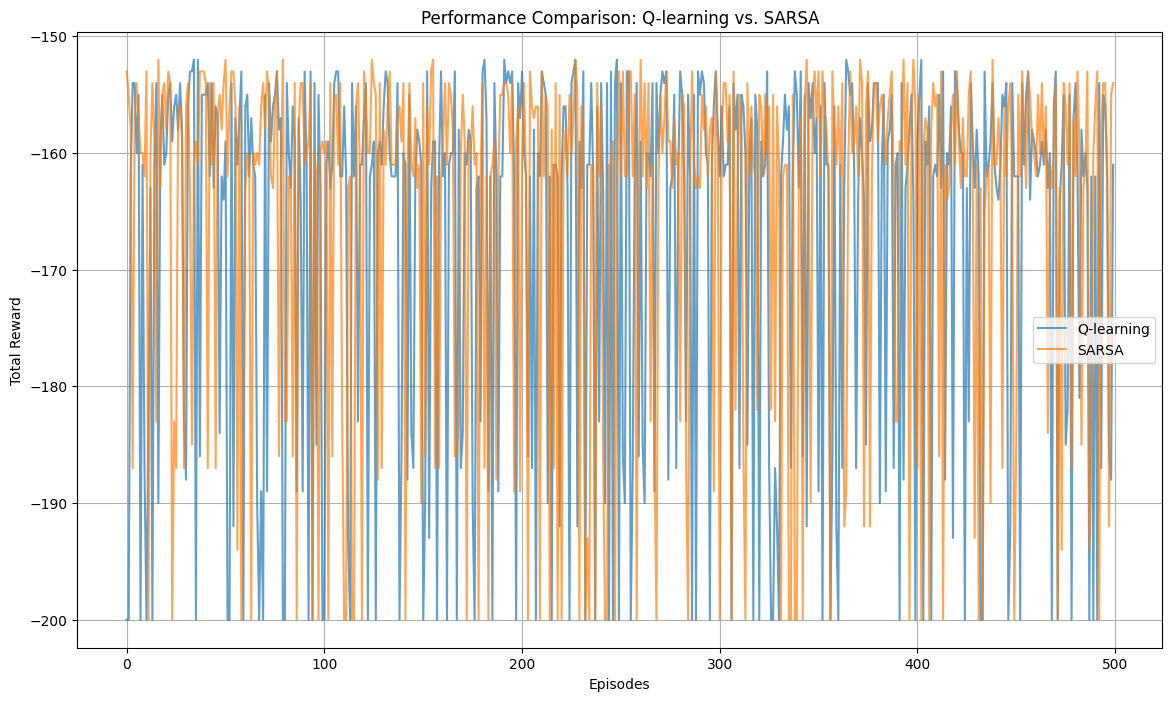

In [5]:
import matplotlib.pyplot as plt

# Define the number of episodes for evaluation
num_episodes = 500

# Initialize arrays to store rewards for Q-learning and SARSA
q_learning_rewards = []
sarsa_rewards = []

# Evaluate Q-learning and SARSA for a fixed number of episodes
for episode in range(num_episodes):
    # Perform Q-learning episode and store the total reward
    q_learning_total_reward = test(q_agent, env, learned_policy)
    q_learning_rewards.append(q_learning_total_reward)

    # Perform SARSA episode and store the total reward
    sarsa_total_reward = test(s_agent, env, learned_policy)
    sarsa_rewards.append(sarsa_total_reward)

# Create a list of episode numbers
episodes = list(range(num_episodes))

# Create the performance comparison chart
plt.figure(figsize=(14, 8))
plt.plot(episodes, q_learning_rewards, label='Q-learning', alpha=0.7)
plt.plot(episodes, sarsa_rewards, label='SARSA', alpha=0.7)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Performance Comparison: Q-learning vs. SARSA')
plt.legend()
plt.grid(True)
plt.show()


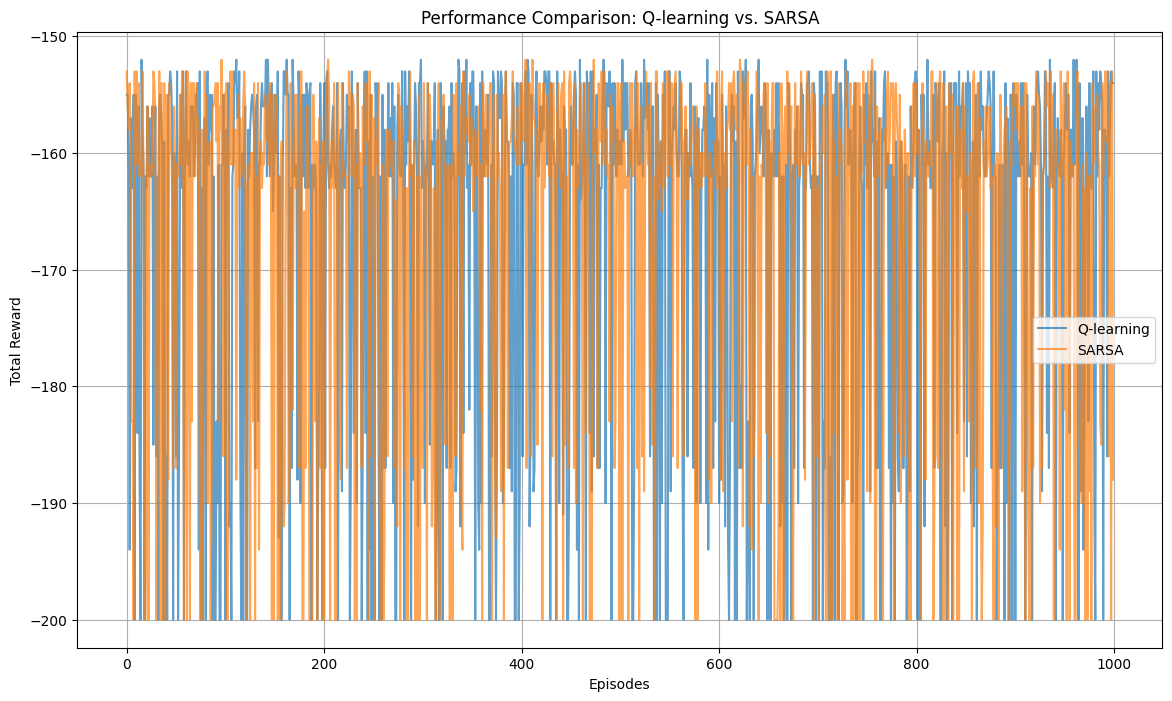

In [6]:
import matplotlib.pyplot as plt

# Define the number of episodes for evaluation
num_episodes = 1000

# Initialize arrays to store rewards for Q-learning and SARSA
q_learning_rewards = []
sarsa_rewards = []

# Evaluate Q-learning and SARSA for a fixed number of episodes
for episode in range(num_episodes):
    # Perform Q-learning episode and store the total reward
    q_learning_total_reward = test(q_agent, env, learned_policy)
    q_learning_rewards.append(q_learning_total_reward)

    # Perform SARSA episode and store the total reward
    sarsa_total_reward = test(s_agent, env, learned_policy)
    sarsa_rewards.append(sarsa_total_reward)

# Create a list of episode numbers
episodes = list(range(num_episodes))

# Create the performance comparison chart
plt.figure(figsize=(14, 8))
plt.plot(episodes, q_learning_rewards, label='Q-learning', alpha=0.7)
plt.plot(episodes, sarsa_rewards, label='SARSA', alpha=0.7)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Performance Comparison: Q-learning vs. SARSA')
plt.legend()
plt.grid(True)
plt.show()


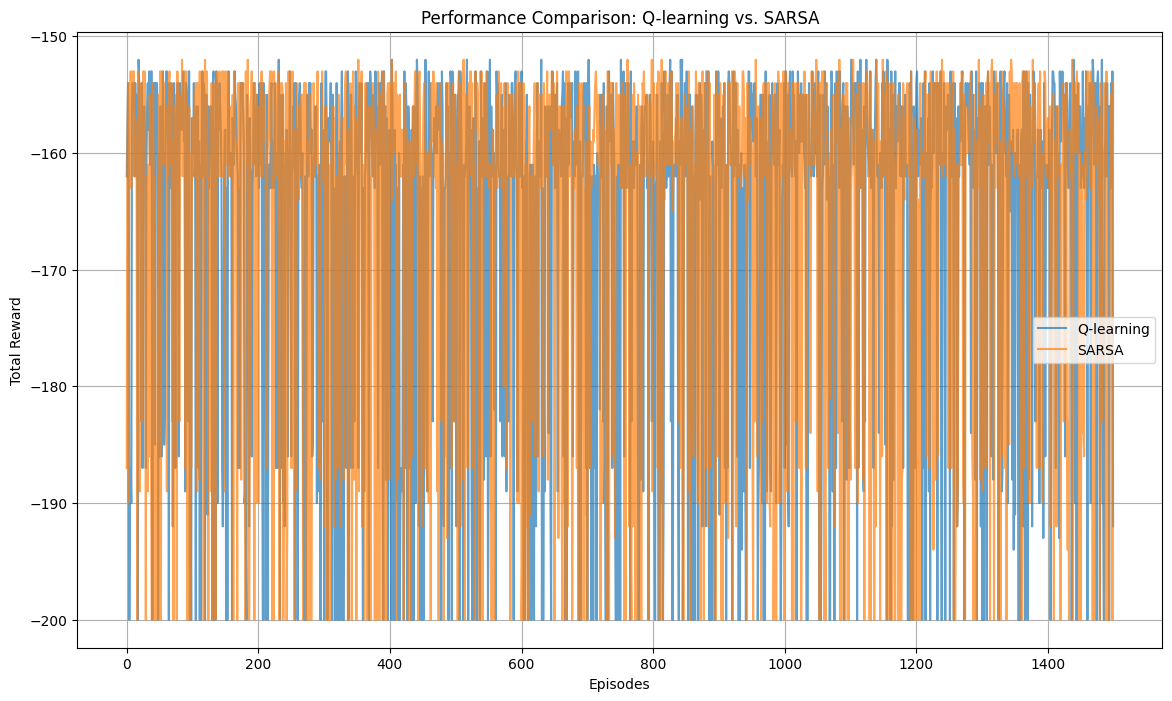

In [7]:
import matplotlib.pyplot as plt

# Define the number of episodes for evaluation
num_episodes = 1500

# Initialize arrays to store rewards for Q-learning and SARSA
q_learning_rewards = []
sarsa_rewards = []

# Evaluate Q-learning and SARSA for a fixed number of episodes
for episode in range(num_episodes):
    # Perform Q-learning episode and store the total reward
    q_learning_total_reward = test(q_agent, env, learned_policy)
    q_learning_rewards.append(q_learning_total_reward)

    # Perform SARSA episode and store the total reward
    sarsa_total_reward = test(s_agent, env, learned_policy)
    sarsa_rewards.append(sarsa_total_reward)

# Create a list of episode numbers
episodes = list(range(num_episodes))

# Create the performance comparison chart
plt.figure(figsize=(14, 8))
plt.plot(episodes, q_learning_rewards, label='Q-learning', alpha=0.7)
plt.plot(episodes, sarsa_rewards, label='SARSA', alpha=0.7)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Performance Comparison: Q-learning vs. SARSA')
plt.legend()
plt.grid(True)
plt.show()
